In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv


# stock price prediction by RNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# importing training data

In [3]:
data_train=pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
training_set=data_train.iloc[:,1:2].values

In [4]:
training_set.shape

(1258, 1)

# feature scaling

In [5]:
sc=MinMaxScaler(feature_range=(0, 1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# creating data structure with 60 timesteps and 1 output

In [6]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
# reshaping training set to 3D
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

# RNN model

In [8]:
model=Sequential()
# input layer
model.add(LSTM(units=50,return_sequences=True,activation="relu",input_shape=(X_train.shape[1],1)))
model.add(Dropout(.2))
# hidden layer 1
model.add(LSTM(units=50,return_sequences=True,activation="relu"))
model.add(Dropout(.2))
# hidden layer 2
model.add(LSTM(units=50,return_sequences=True,activation="relu"))
model.add(Dropout(.2))
# hidden layer 3
model.add(LSTM(units=50,activation="relu"))
# output layer
model.add(Dense(units=1,activation="sigmoid"))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 22s 433ms/step - loss: 0.0043
Epoch 2/50
38/38 [==============================] - 15s 406ms/step - loss: 0.0030
Epoch 3/50
38/38 [==============================] - 17s 447ms/step - loss: 0.0029
Epoch 4/50
38/38 [==============================] - 15s 402ms/step - loss: 0.0029
Epoch 5/50
38/38 [==============================] - 16s 434ms/step - loss: 0.0026
Epoch 6/50
38/38 [==============================] - 15s 397ms/step - loss: 0.0027
Epoch 7/50
38/38 [==============================] - 16s 432ms/step - loss: 0.0025
Epoch 8/50
38/38 [==============================] - 15s 407ms/step - loss: 0.0023
Epoch 9/50
38/38 [==============================] - 16s 432ms/step - loss: 0.0023
Epoch 10/50
38/38 [==============================] - 16s 405ms/step - loss: 0.0021
Epoch 11/50
38/38 [==============================] - 16s 420ms/step - loss: 0.0026
Epoch 12/50
38/38 [==============================] - 16s 412ms/step - loss: 0.0020
Epoch 13/50
3

# making the predictions and visualizing the results

In [12]:
# getting the real stock price of 2017
data_test=pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv')
real_stock_price=data_test.iloc[:,1:2].values

In [13]:
# getting the predicted stock price of 2017
total_data=pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs=total_data[len(total_data)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 874ms/step


# comparing between real and predicted values

In [23]:
print(predicted_stock_price[2])
print(predicted_stock_price[13])

[763.3772]
[770.4489]


In [24]:
print(real_stock_price[2])
print(real_stock_price[13])

[786.08]
[807.25]


# visualizing real and predicted price

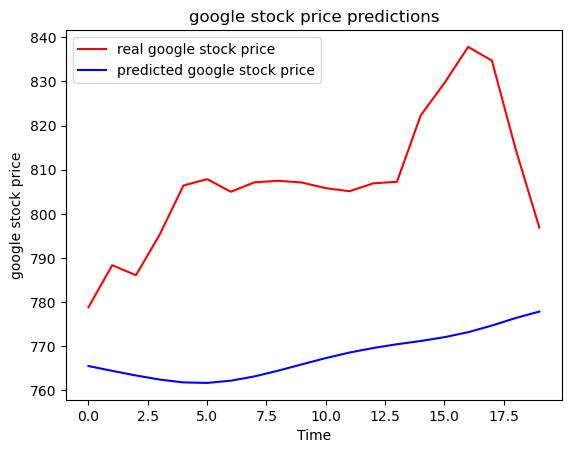

In [14]:
plt.plot(real_stock_price,c='red',label='real google stock price')
plt.plot(predicted_stock_price,c='blue',label='predicted google stock price')
plt.title('google stock price predictions')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()